In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre

In [11]:
res = np.loadtxt("output.txt", dtype={'names' : ('dim', 'level', 'res', 'funceval'), 
                                      'formats':('i4', 'i4', 'f8', 'i8')})

In [9]:
res5d = np.array([(res,funcevals) for (dim,_,res,funcevals) in res if dim == 5])
res6d = np.array([(res,funcevals) for (dim,_,res,funcevals) in res if dim == 6])
res7d = np.array([(res,funcevals) for (dim,_,res,funcevals) in res if dim == 7])
res8d = np.array([(res,funcevals) for (dim,_,res,funcevals) in res if dim == 8])

### Convergence of Sparse Grid Quadrature with Gauß-Legendre as 1d rule

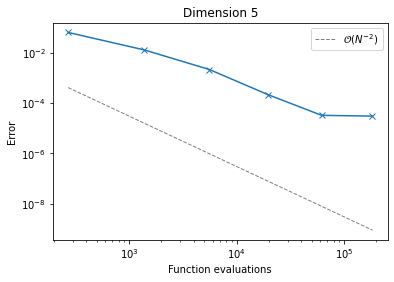

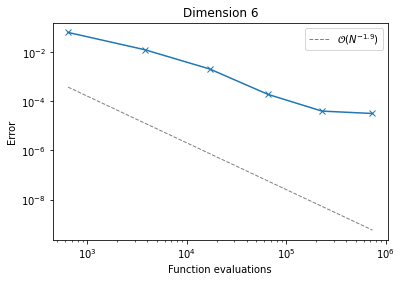

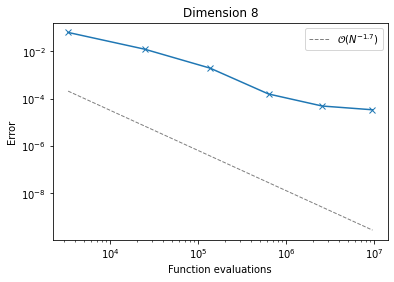

In [10]:
y = lambda x : 30*x**-2 

plt.loglog(res5d[:,1], np.abs(1 - res5d[:,0]), '-x');
plt.title("Dimension 5")
plt.xlabel("Function evaluations")
plt.ylabel("Error")

x0 = res5d[0,1]
x1 = res5d[-1,1]
y0 = y(x0)
y1 = y(x1)  
plt.loglog([x0,x1], [y0,y1], '--', color='gray', linewidth=1, label=f"$\mathcal{{O}}(N^{{-2}})$")
plt.legend()
plt.show();

plt.loglog(res6d[:,1], np.abs(1 - res6d[:,0]), '-x');
plt.title("Dimension 6")
plt.xlabel("Function evaluations")
plt.ylabel("Error")

y = lambda x : 80*x**-1.9
x0 = res6d[0,1]
x1 = res6d[-1,1]
y0 = y(x0)
y1 = y(x1)  
plt.loglog([x0,x1], [y0,y1], '--', color='gray', linewidth=1, label=f"$\mathcal{{O}}(N^{{-1.9}})$")
plt.legend()
plt.show();
plt.show();

plt.loglog(res8d[:,1], np.abs(1 - res8d[:,0]), '-x');
plt.title("Dimension 8")
plt.xlabel("Function evaluations")
plt.ylabel("Error")

y = lambda x : 200*x**-1.7
x0 = res8d[0,1]
x1 = res8d[-1,1]
y0 = y(x0)
y1 = y(x1)  
plt.loglog([x0,x1], [y0,y1], '--', color='gray', linewidth=1, label=f"$\mathcal{{O}}(N^{{-1.7}})$")
plt.legend()
plt.show();
plt.show();

Functions to generate Gauss-Legendre weights and points

In [5]:
weights = []
points  = []
for i in range(1,100):
    roots, ws = roots_legendre(i)
    roots = roots/2 + 0.5
    ws = ws / 2
    points.append(roots)
    weights.append(ws)

In [6]:
with open("weights.txt", "w") as f:
    for i, row in enumerate(weights):
        f.write(f"if (n == {i+1})\n")
        f.write("return {")
        for val in row:
            f.write(str(val))
            f.write(",")
        f.write("};\n")

In [7]:
roots_legendre(1)

(array([0.]), array([2.]))